In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from scipy.stats import zscore,shapiro,kstest,normaltest
import warnings
warnings.filterwarnings("ignore")

# Problem Statement 

# Data Gathering

In [2]:
df = pd.read_csv("cereal.csv")
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [4]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## name

In [5]:
df['name']

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

In [6]:
df['name'].value_counts()

100% Bran                    1
Nutri-Grain Almond-Raisin    1
Quaker Oat Squares           1
Puffed Wheat                 1
Puffed Rice                  1
                            ..
Frosted Flakes               1
Froot Loops                  1
Double Chex                  1
Crispy Wheat & Raisins       1
Wheaties Honey Gold          1
Name: name, Length: 77, dtype: int64

In [7]:
df = pd.get_dummies(df,columns = ['name'])
df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,name_Special K,name_Strawberry Fruit Wheats,name_Total Corn Flakes,name_Total Raisin Bran,name_Total Whole Grain,name_Triples,name_Trix,name_Wheat Chex,name_Wheaties,name_Wheaties Honey Gold
0,N,C,70,4,1,130,10.0,5.0,6,280,...,0,0,0,0,0,0,0,0,0,0
1,Q,C,120,3,5,15,2.0,8.0,8,135,...,0,0,0,0,0,0,0,0,0,0
2,K,C,70,4,1,260,9.0,7.0,5,320,...,0,0,0,0,0,0,0,0,0,0
3,K,C,50,4,0,140,14.0,8.0,0,330,...,0,0,0,0,0,0,0,0,0,0
4,R,C,110,2,2,200,1.0,14.0,8,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,G,C,110,2,1,250,0.0,21.0,3,60,...,0,0,0,0,0,1,0,0,0,0
73,G,C,110,1,1,140,0.0,13.0,12,25,...,0,0,0,0,0,0,1,0,0,0
74,R,C,100,3,1,230,3.0,17.0,3,115,...,0,0,0,0,0,0,0,1,0,0
75,G,C,100,3,1,200,3.0,17.0,3,110,...,0,0,0,0,0,0,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 92 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   mfr                                          77 non-null     object 
 1   type                                         77 non-null     object 
 2   calories                                     77 non-null     int64  
 3   protein                                      77 non-null     int64  
 4   fat                                          77 non-null     int64  
 5   sodium                                       77 non-null     int64  
 6   fiber                                        77 non-null     float64
 7   carbo                                        77 non-null     float64
 8   sugars                                       77 non-null     int64  
 9   potass                                       77 non-null     int64  
 10  vita

## mfr

In [9]:
df['mfr']

0     N
1     Q
2     K
3     K
4     R
     ..
72    G
73    G
74    R
75    G
76    G
Name: mfr, Length: 77, dtype: object

In [10]:
df['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

In [11]:
label_encoder = preprocessing.LabelEncoder()
df['mfr'] = label_encoder.fit_transform(df['mfr'])

In [12]:
df['mfr'].value_counts()

2    23
1    22
4     9
5     8
6     8
3     6
0     1
Name: mfr, dtype: int64

In [13]:
mfr_dict = {'K': 2, 'G': 1, 'P': 4, 'Q': 5, 'R': 6, 'N': 3, 'A': 0}
mfr_dict

{'K': 2, 'G': 1, 'P': 4, 'Q': 5, 'R': 6, 'N': 3, 'A': 0}

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 92 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   mfr                                          77 non-null     int32  
 1   type                                         77 non-null     object 
 2   calories                                     77 non-null     int64  
 3   protein                                      77 non-null     int64  
 4   fat                                          77 non-null     int64  
 5   sodium                                       77 non-null     int64  
 6   fiber                                        77 non-null     float64
 7   carbo                                        77 non-null     float64
 8   sugars                                       77 non-null     int64  
 9   potass                                       77 non-null     int64  
 10  vita

## type

In [15]:
df['type']

0     C
1     C
2     C
3     C
4     C
     ..
72    C
73    C
74    C
75    C
76    C
Name: type, Length: 77, dtype: object

In [16]:
df['type'].value_counts()

C    74
H     3
Name: type, dtype: int64

In [17]:
df['type'] = label_encoder.fit_transform(df['type'])

In [18]:
df['type'].value_counts()

0    74
1     3
Name: type, dtype: int64

In [19]:
type_dict = {'C': 0, 'H': 1}
type_dict

{'C': 0, 'H': 1}

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 92 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   mfr                                          77 non-null     int32  
 1   type                                         77 non-null     int32  
 2   calories                                     77 non-null     int64  
 3   protein                                      77 non-null     int64  
 4   fat                                          77 non-null     int64  
 5   sodium                                       77 non-null     int64  
 6   fiber                                        77 non-null     float64
 7   carbo                                        77 non-null     float64
 8   sugars                                       77 non-null     int64  
 9   potass                                       77 non-null     int64  
 10  vita

# Feature engineering

<AxesSubplot:>

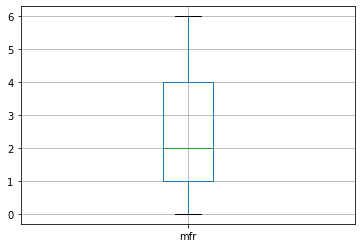

In [21]:
df[['mfr']].boxplot()

<AxesSubplot:>

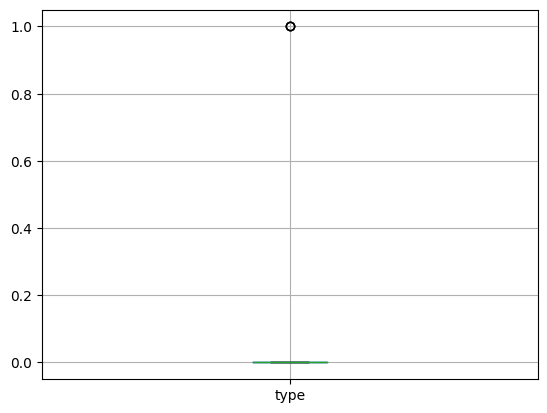

In [22]:
df[['type']].boxplot()

<AxesSubplot:>

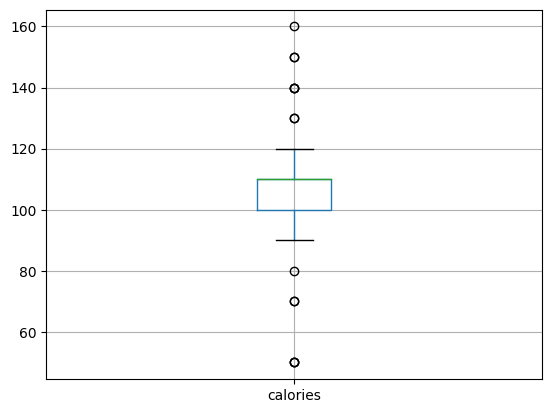

In [23]:
df[['calories']].boxplot()

q1--> 100.0
q2--> 110.0
q3--> 110.0
upper_tail--> 125.0
lower_tail--> 85.0
mean--> 106.88311688311688
110.0


<AxesSubplot:>

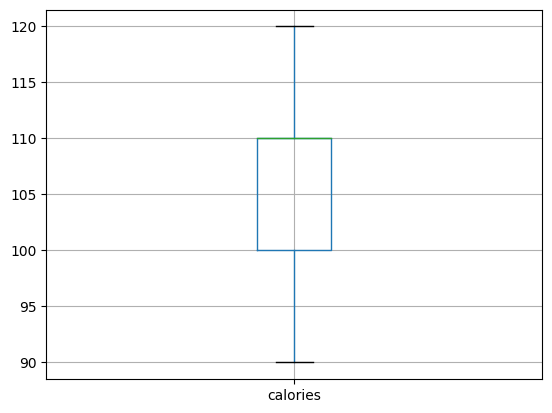

In [24]:
q1=df['calories'].quantile(0.25)
q2=df['calories'].quantile(0.50)
q3=df['calories'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['calories'].mean()))

df['calories'].median()

size_df=df[['calories']].loc[(df['calories'] < upper_tail) & 
                                   (df['calories'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['calories'] > upper_tail) |
                (df['calories'] < lower_tail), 'calories'] = size_df


df[['calories']].boxplot()

<AxesSubplot:>

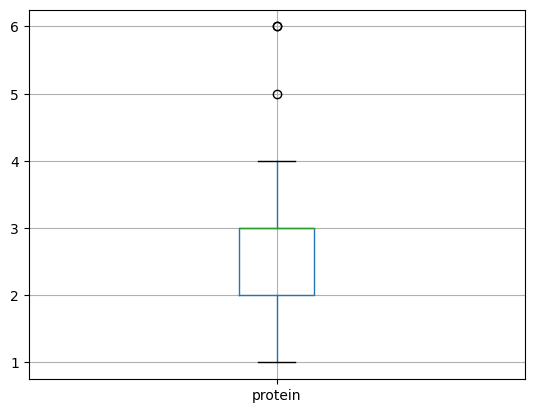

In [25]:
df[['protein']].boxplot()

q1--> 2.0
q2--> 3.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5
mean--> 2.5454545454545454
2.0


<AxesSubplot:>

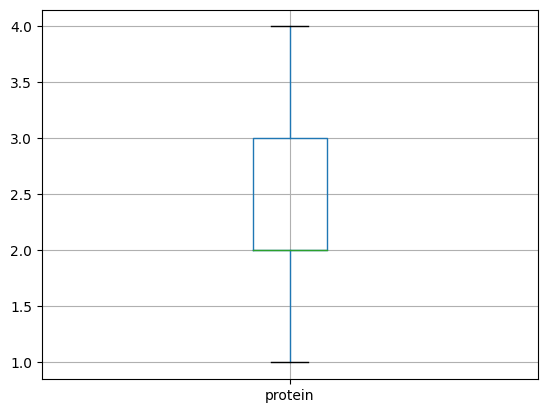

In [26]:
q1=df['protein'].quantile(0.25)
q2=df['protein'].quantile(0.50)
q3=df['protein'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['protein'].mean()))

df['protein'].median()

size_df=df[['protein']].loc[(df['protein'] < upper_tail) & 
                                   (df['protein'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['protein'] > upper_tail) |
                (df['protein'] < lower_tail), 'protein'] = size_df


df[['protein']].boxplot()

<AxesSubplot:>

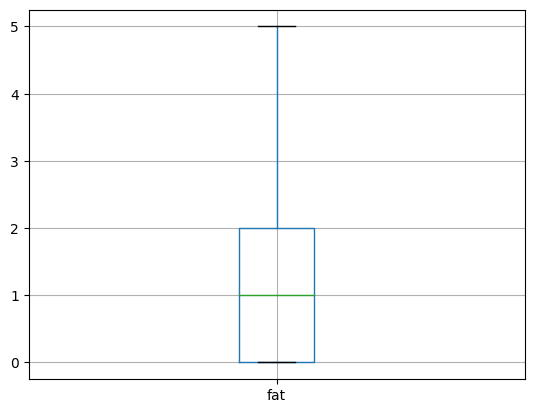

In [27]:
df[['fat']].boxplot()

<AxesSubplot:>

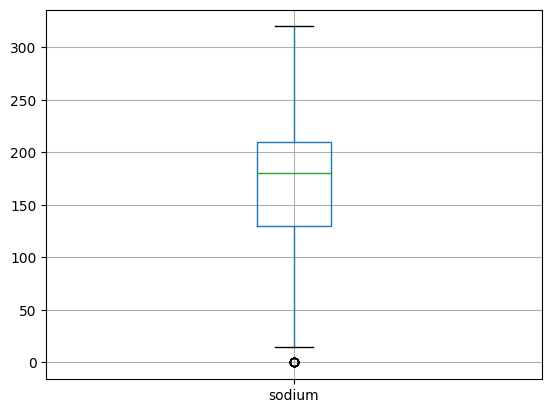

In [28]:
df[['sodium']].boxplot()

<AxesSubplot:>

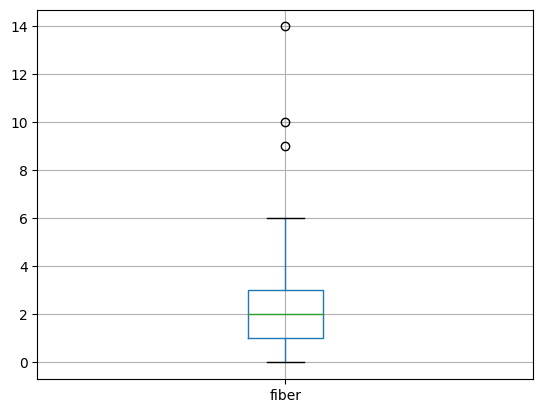

In [29]:
df[['fiber']].boxplot()

q1--> 1.0
q2--> 2.0
q3--> 3.0
upper_tail--> 6.0
lower_tail--> -2.0
mean--> 2.1519480519480516
1.5


<AxesSubplot:>

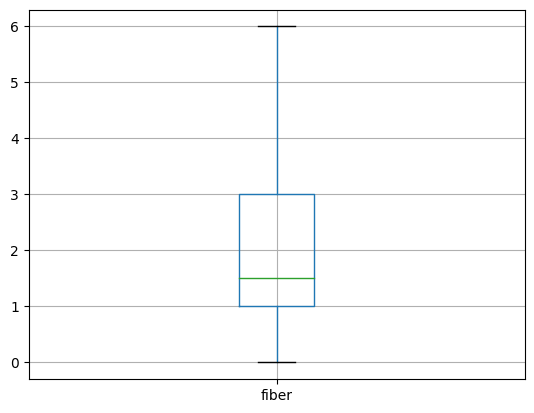

In [30]:
q1=df['fiber'].quantile(0.25)
q2=df['fiber'].quantile(0.50)
q3=df['fiber'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['fiber'].mean()))

df['fiber'].median()

size_df=df[['fiber']].loc[(df['fiber'] < upper_tail) & 
                                   (df['fiber'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['fiber'] > upper_tail) |
                (df['fiber'] < lower_tail), 'fiber'] = size_df


df[['fiber']].boxplot()

<AxesSubplot:>

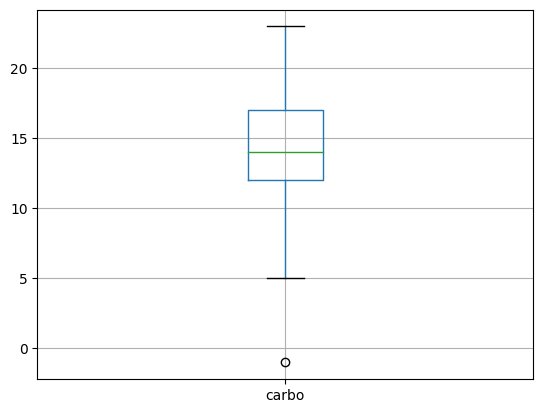

In [31]:
df[['carbo']].boxplot()

<AxesSubplot:>

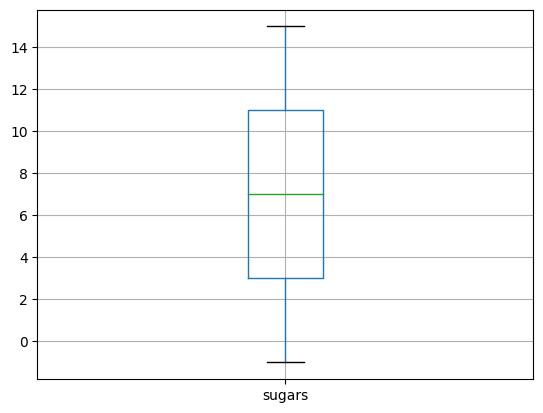

In [32]:
df[['sugars']].boxplot()

<AxesSubplot:>

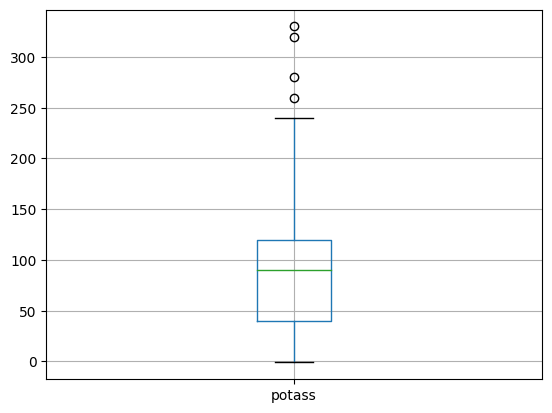

In [33]:
df[['potass']].boxplot()

q1--> 40.0
q2--> 90.0
q3--> 120.0
upper_tail--> 240.0
lower_tail--> -80.0
mean--> 96.07792207792208
87.5


<AxesSubplot:>

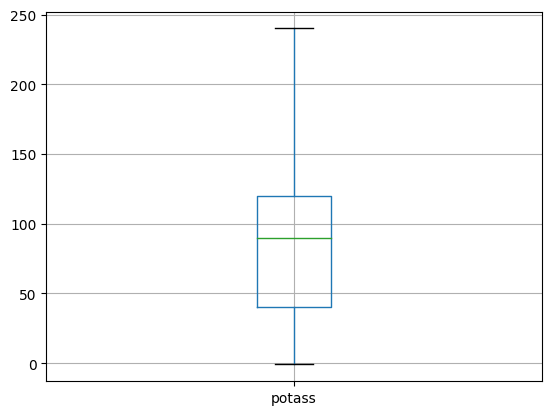

In [34]:
q1=df['potass'].quantile(0.25)
q2=df['potass'].quantile(0.50)
q3=df['potass'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['potass'].mean()))

df['potass'].median()

size_df=df[['potass']].loc[(df['potass'] < upper_tail) & 
                                   (df['potass'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['potass'] > upper_tail) |
                (df['potass'] < lower_tail), 'potass'] = upper_tail


df[['potass']].boxplot()

<AxesSubplot:>

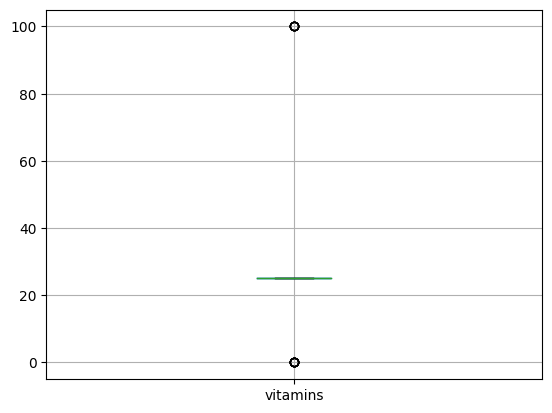

In [35]:
df[['vitamins']].boxplot()

q1--> 25.0
q2--> 25.0
q3--> 25.0
upper_tail--> 25.0
lower_tail--> 25.0
mean--> 28.246753246753247
nan


<AxesSubplot:>

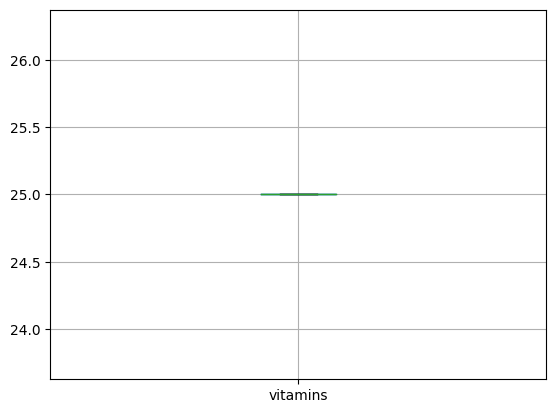

In [36]:
q1=df['vitamins'].quantile(0.25)
q2=df['vitamins'].quantile(0.50)
q3=df['vitamins'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['vitamins'].mean()))

df['vitamins'].median()

size_df=df[['vitamins']].loc[(df['vitamins'] < upper_tail) & 
                                   (df['vitamins'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['vitamins'] > upper_tail) |
                (df['vitamins'] < lower_tail), 'vitamins'] = size_df


df[['vitamins']].boxplot()

<AxesSubplot:>

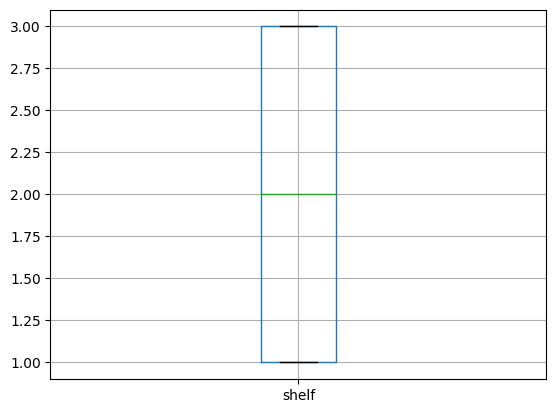

In [37]:
df[['shelf']].boxplot()

<AxesSubplot:>

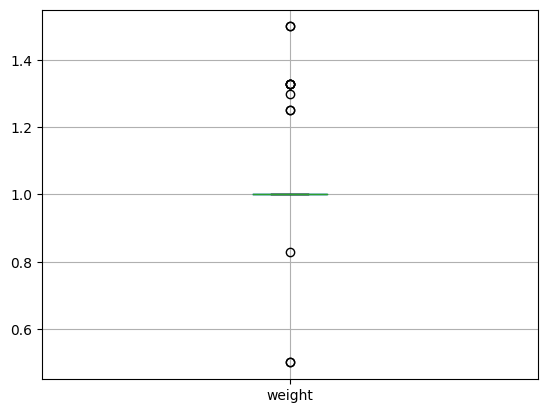

In [38]:
df[['weight']].boxplot()

q1--> 1.0
q2--> 1.0
q3--> 1.0
upper_tail--> 1.0
lower_tail--> 1.0
mean--> 1.0296103896103896
nan


<AxesSubplot:>

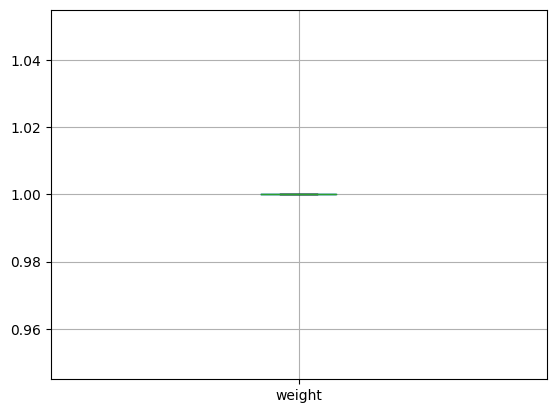

In [39]:
q1=df['weight'].quantile(0.25)
q2=df['weight'].quantile(0.50)
q3=df['weight'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['weight'].mean()))

df['weight'].median()

size_df=df[['weight']].loc[(df['weight'] < upper_tail) & 
                                   (df['weight'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['weight'] > upper_tail) |
                (df['weight'] < lower_tail), 'weight'] = size_df


df[['weight']].boxplot()

<AxesSubplot:>

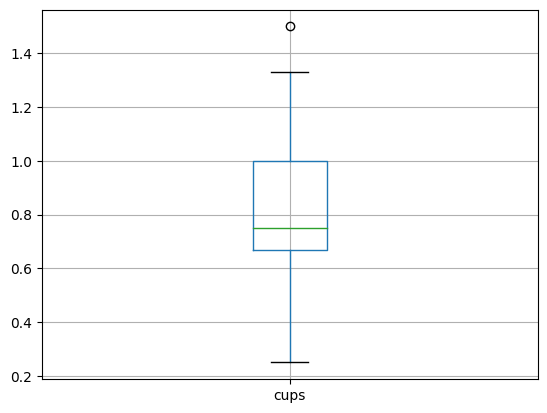

In [40]:
df[['cups']].boxplot()

q1--> 0.67
q2--> 0.75
q3--> 1.0
upper_tail--> 1.4949999999999999
lower_tail--> 0.1750000000000001
mean--> 0.821038961038961
0.75


<AxesSubplot:>

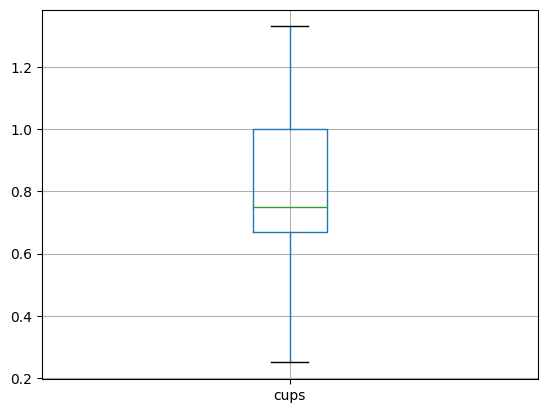

In [41]:
q1=df['cups'].quantile(0.25)
q2=df['cups'].quantile(0.50)
q3=df['cups'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['cups'].mean()))

df['cups'].median()

size_df=df[['cups']].loc[(df['cups'] < upper_tail) & 
                                   (df['cups'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['cups'] > upper_tail) |
                (df['cups'] < lower_tail), 'cups'] = size_df


df[['cups']].boxplot()

# Feature selection

In [42]:
df.corr()

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,name_Special K,name_Strawberry Fruit Wheats,name_Total Corn Flakes,name_Total Raisin Bran,name_Total Whole Grain,name_Triples,name_Trix,name_Wheat Chex,name_Wheaties,name_Wheaties Honey Gold
mfr,1.000000,-0.007103,-0.035222,0.046509,0.077661,-0.175791,0.150129,-0.063045,-0.132900,0.006860,...,-0.048558,0.018209,-0.115326,-0.115326,-0.115326,-0.115326,-0.115326,0.218512,-0.115326,-0.115326
type,-0.007103,1.000000,-0.183056,0.135678,-0.002615,-0.321552,-0.073555,-0.123023,-0.285219,-0.080558,...,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096,-0.023096
calories,-0.035222,-0.183056,1.000000,-0.193114,0.410336,0.277421,-0.170652,-0.179320,0.420453,0.004119,...,0.039108,-0.247683,0.039108,0.039108,-0.104288,0.039108,0.039108,-0.104288,-0.104288,0.039108
protein,0.046509,0.135678,-0.193114,1.000000,0.213855,-0.123989,0.558712,-0.051756,-0.194342,0.700347,...,-0.052091,-0.052091,-0.052091,0.077296,0.077296,-0.052091,-0.181478,0.077296,0.077296,-0.052091
fat,0.077661,-0.002615,0.410336,0.213855,1.000000,-0.005407,0.137702,-0.318043,0.270819,0.237533,...,-0.116207,-0.116207,-0.001490,-0.001490,-0.001490,-0.001490,-0.001490,-0.001490,-0.001490,-0.001490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_Triples,-0.115326,-0.023096,0.039108,-0.052091,-0.001490,0.124402,-0.136132,0.172763,-0.101880,-0.060527,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,1.000000,-0.013158,-0.013158,-0.013158,-0.013158
name_Trix,-0.115326,-0.023096,0.039108,-0.181478,-0.001490,-0.027098,-0.136132,-0.043103,0.131904,-0.124546,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,1.000000,-0.013158,-0.013158,-0.013158
name_Wheat Chex,0.218512,-0.023096,-0.104288,0.077296,-0.001490,0.096856,0.093070,0.064830,-0.101880,0.040074,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,1.000000,-0.013158,-0.013158
name_Wheaties,-0.115326,-0.023096,-0.104288,0.077296,-0.001490,0.055538,0.093070,0.064830,-0.101880,0.030929,...,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,-0.013158,1.000000,-0.013158


In [43]:
df = df.drop(['vitamins','weight'],axis =1)
df

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,name_Special K,name_Strawberry Fruit Wheats,name_Total Corn Flakes,name_Total Raisin Bran,name_Total Whole Grain,name_Triples,name_Trix,name_Wheat Chex,name_Wheaties,name_Wheaties Honey Gold
0,3,0,110,4,1,130,1.5,5.0,6,240,...,0,0,0,0,0,0,0,0,0,0
1,5,0,120,3,5,15,2.0,8.0,8,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,110,4,1,260,1.5,7.0,5,240,...,0,0,0,0,0,0,0,0,0,0
3,2,0,110,4,0,140,1.5,8.0,0,240,...,0,0,0,0,0,0,0,0,0,0
4,6,0,110,2,2,200,1.0,14.0,8,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,...,0,0,0,0,0,1,0,0,0,0
73,1,0,110,1,1,140,0.0,13.0,12,25,...,0,0,0,0,0,0,1,0,0,0
74,6,0,100,3,1,230,3.0,17.0,3,115,...,0,0,0,0,0,0,0,1,0,0
75,1,0,100,3,1,200,3.0,17.0,3,110,...,0,0,0,0,0,0,0,0,1,0


# Model Training

In [44]:
x = df.drop('rating',axis = 1)
y = df['rating']

In [45]:
x

,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,...,name_Special K,name_Strawberry Fruit Wheats,name_Total Corn Flakes,name_Total Raisin Bran,name_Total Whole Grain,name_Triples,name_Trix,name_Wheat Chex,name_Wheaties,name_Wheaties Honey Gold
0,3,0,110,4,1,130,1.5,5.0,6,240,...,0,0,0,0,0,0,0,0,0,0
1,5,0,120,3,5,15,2.0,8.0,8,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,110,4,1,260,1.5,7.0,5,240,...,0,0,0,0,0,0,0,0,0,0
3,2,0,110,4,0,140,1.5,8.0,0,240,...,0,0,0,0,0,0,0,0,0,0
4,6,0,110,2,2,200,1.0,14.0,8,-1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,0,110,2,1,250,0.0,21.0,3,60,...,0,0,0,0,0,1,0,0,0,0
73,1,0,110,1,1,140,0.0,13.0,12,25,...,0,0,0,0,0,0,1,0,0,0
74,6,0,100,3,1,230,3.0,17.0,3,115,...,0,0,0,0,0,0,0,1,0,0
75,1,0,100,3,1,200,3.0,17.0,3,110,...,0,0,0,0,0,0,0,0,1,0


In [46]:
y

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     34.384843
        ...    
72    39.106174
73    27.753301
74    49.787445
75    51.592193
76    36.187559
Name: rating, Length: 77, dtype: float64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)


In [48]:
cereal = LinearRegression()
cereal.fit(x_train,y_train)

LinearRegression()

# Model Evalution

### testing data

In [49]:
y_test_pred = cereal.predict(x_test)
mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

mse--> 7.088158682764389
rmse--> 2.6623596080853518
mae--> 2.2068937933137205
r2_score--> 0.9573386163357929


### training data

In [50]:
y_train_pred = cereal.predict(x_train)
mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)

rmse = np.sqrt(mse)
print("rmse-->",rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

mse--> 1.2193213511236186e-25
rmse--> 3.4918782211348934e-13
mae--> 2.789753855976131e-13
r2_score--> 1.0


# Training on single row

In [51]:
column_names = x.columns
column_names

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'shelf', 'cups', 'name_100% Bran',
       'name_100% Natural Bran', 'name_All-Bran',
       'name_All-Bran with Extra Fiber', 'name_Almond Delight',
       'name_Apple Cinnamon Cheerios', 'name_Apple Jacks', 'name_Basic 4',
       'name_Bran Chex', 'name_Bran Flakes', 'name_Cap'n'Crunch',
       'name_Cheerios', 'name_Cinnamon Toast Crunch', 'name_Clusters',
       'name_Cocoa Puffs', 'name_Corn Chex', 'name_Corn Flakes',
       'name_Corn Pops', 'name_Count Chocula', 'name_Cracklin' Oat Bran',
       'name_Cream of Wheat (Quick)', 'name_Crispix',
       'name_Crispy Wheat & Raisins', 'name_Double Chex', 'name_Froot Loops',
       'name_Frosted Flakes', 'name_Frosted Mini-Wheats',
       'name_Fruit & Fibre Dates; Walnuts; and Oats', 'name_Fruitful Bran',
       'name_Fruity Pebbles', 'name_Golden Crisp', 'name_Golden Grahams',
       'name_Grape Nuts Flakes', 'name_Grape-Nuts', '

In [52]:
x.head(1).T

,0
mfr,3.0
type,0.0
calories,110.0
protein,4.0
fat,1.0
...,...
name_Triples,0.0
name_Trix,0.0
name_Wheat Chex,0.0
name_Wheaties,0.0


## user input

In [53]:
mfr = 'K'
types = 'C'
calories = 110
protein = 4
fat = 2
sodium = 130
fiber= 1.5
carbo = 5
sugars = 6
potass = 87.5
shelf = 3
cups = 1.22
name = 'Wheat Chex'

name_col = 'name_' + name
print(name_col)

name_Wheat Chex


In [54]:
mfr_dict = {'K': 2, 'G': 1, 'P': 4, 'Q': 5, 'R': 6, 'N': 3, 'A': 0}
type_dict = {'C': 0, 'H': 1}

In [55]:
name_index = np.where(column_names == name_col)[0][0]
name_index

86

In [56]:
array = np.zeros(column_names.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [57]:
array[0] = mfr_dict[mfr]
array[1] = type_dict[types]
array[2] = calories
array[3] = protein
array[4] = fat
array[5] = sodium
array[6] = fiber
array[7] = carbo
array[8] = sugars
array[9] = potass
array[10] = shelf
array[11] = cups
array[name_index] = 1

array

array([  2,   0, 110,   4,   2, 130,   1,   5,   6,  87,   3,   1,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0])

In [58]:
predicted_rating = cereal.predict([array])[0]
print(f"predicted ratings of cereal is {predicted_rating} %")

predicted ratings of cereal is 48.747371344562346 %


In [59]:
cereal_data = {"mfr_dict":mfr_dict,"type_dict":type_dict,"columns":list(column_names)}
cereal_data

{'mfr_dict': {'K': 2, 'G': 1, 'P': 4, 'Q': 5, 'R': 6, 'N': 3, 'A': 0},
 'type_dict': {'C': 0, 'H': 1},
 'columns': ['mfr',
  'type',
  'calories',
  'protein',
  'fat',
  'sodium',
  'fiber',
  'carbo',
  'sugars',
  'potass',
  'shelf',
  'cups',
  'name_100% Bran',
  'name_100% Natural Bran',
  'name_All-Bran',
  'name_All-Bran with Extra Fiber',
  'name_Almond Delight',
  'name_Apple Cinnamon Cheerios',
  'name_Apple Jacks',
  'name_Basic 4',
  'name_Bran Chex',
  'name_Bran Flakes',
  "name_Cap'n'Crunch",
  'name_Cheerios',
  'name_Cinnamon Toast Crunch',
  'name_Clusters',
  'name_Cocoa Puffs',
  'name_Corn Chex',
  'name_Corn Flakes',
  'name_Corn Pops',
  'name_Count Chocula',
  "name_Cracklin' Oat Bran",
  'name_Cream of Wheat (Quick)',
  'name_Crispix',
  'name_Crispy Wheat & Raisins',
  'name_Double Chex',
  'name_Froot Loops',
  'name_Frosted Flakes',
  'name_Frosted Mini-Wheats',
  'name_Fruit & Fibre Dates; Walnuts; and Oats',
  'name_Fruitful Bran',
  'name_Fruity Pebbles

# pickle file

In [60]:
import pickle
with open("cereal.pkl","wb") as f:
    pickle.dump(cereal,f)

# json file

In [61]:
import json
with open("cereal_data.json","w") as f:
    json.dump(cereal_data,f)